<a href="https://colab.research.google.com/github/Kaleab1999/Ethiopia-airlines-tweeter-review-sentiment-analysis/blob/main/bert_for_thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 11.8 MB/s 
     |████████████████████████████████| 163 kB 60.2 MB/s 
     |████████████████████████████████| 7.6 MB 18.7 MB/s 


### importing Bert tokenizer and model

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

### loading dataset

In [ ]:
df= pd.read_csv('/content/merge-csv.com__6361876ee50a8.csv', encoding = 'unicode_escape')
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,Ethiopian Airlines (EA) flight ET-3717 was int...,en,https://twitter.com/samsenge/status/1586134568...,NaN
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,"_ details: It's #Ethiopian_Airlines flight, sm...",en,https://twitter.com/BargoYousif/status/1586129...,NaN
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,I look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,@jaeyoonieee me getting on ethiopian airlines ...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,#ETH552 ET-AVE A350 941 Ethiopian Airlines ADD...,en,https://twitter.com/OverMeon/status/1586035262...,NaN


In [ ]:
df['label'].value_counts()

neutral     2274
positive    1119
negative    1036
Name: label, dtype: int64

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### visualizing the distribution of label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


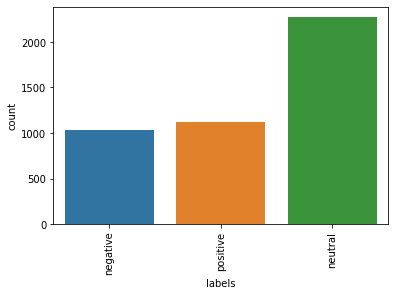

In [ ]:
sns.countplot('label', data = df)
plt.xlabel('labels')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

### loading pretrained model

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained ("bert-base-uncased", num_labels=3)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
!pip install text_hammer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 34.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import spacy
import re
import text_hammer as th
nlp=  spacy.load('en_core_web_sm')

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value [] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


### funcion to preprocess the text

In [ ]:
def text_preprocessor(x):

  doc = nlp(x)
  
  text= [word.lemma_.lower().strip() for word in doc ]
  text = str(x).lower().replace('\\', '').replace('_', ' ')
  text = th.cont_exp(text)
  text = th.remove_emails(text)
  text = th.remove_urls(text)
  text = th.remove_html_tags(text)
  text = th.remove_rt(text)
  text = th.remove_accented_chars(text)
  text = th.remove_special_chars(text)
  text = re.sub("(.)\\1{2,}", "\\1", text)
  text= re.sub('[^a-zA-Z]', ' ',text)

  text= text.strip()

  return text

In [ ]:
df['processed']= df['tweet'].apply(text_preprocessor)

In [ ]:
df.head()

,created_at,user_id,name,label,tweet,language,link,Column1,processed
0,2022-10-28 23:15:24 UTC,4.386524e+08,AfricanSon®,negative,Ethiopian Airlines (EA) flight ET-3717 was int...,en,https://twitter.com/samsenge/status/1586134568...,NaN,ethiopian airlines ea flight et was interc...
1,2022-10-28 22:53:28 UTC,1.320000e+18,Bargo YOUSIF,negative,"_ details: It's #Ethiopian_Airlines flight, sm...",en,https://twitter.com/BargoYousif/status/1586129...,NaN,details it is ethiopian airlines flight smoke ...
2,2022-10-28 22:21:31 UTC,8.226798e+08,Dr. Aklog Birara,positive,I look forward to seeing integrated infrastruc...,en,https://twitter.com/DrAklogBirara/status/15861...,NaN,i look forward to seeing integrated infrastruc...
3,2022-10-28 19:46:19 UTC,1.470000e+18,bill,negative,@jaeyoonieee me getting on ethiopian airlines ...,en,https://twitter.com/ysfkd_/status/158608195096...,NaN,jaeyoonie me getting on ethiopian airlines and...
4,2022-10-28 16:40:48 UTC,1.570000e+18,OverMeon,neutral,#ETH552 ET-AVE A350 941 Ethiopian Airlines ADD...,en,https://twitter.com/OverMeon/status/1586035262...,NaN,eth etavenuea ethiopian airlines adu...


In [ ]:
df['label']= df['label'].astype('category').cat.codes

In [ ]:
# chaning the dataset to list, since tokenizer doesn't accept pandas.series data

X= list(df['processed'])
y= list(df['label'])

In [ ]:
# train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify= y, test_size=0.2)

In [ ]:
## tokenize, padding = True means if the sentence has small number of words than the max_length to put 0 at the end.
# truncation = True means if the sentence has large number of words than the max_length to remove the rest

train_data= tokenizer (X_train, padding=True , truncation=True, max_length=512)

test_data= tokenizer(X_test, padding=True, truncation=True, max_length=512)

In [ ]:
type(train_data)

transformers.tokenization_utils_base.BatchEncoding

In [ ]:
train_data.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
### changing to torch dataset

import torch

In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
train_dataset = Dataset(train_data, y_train)
test_dataset = Dataset(test_data, y_test)

In [ ]:
train_dataset[6]

{'input_ids': tensor([  101, 11937,  4095, 12733, 11636,  4875, 11031,  3695, 19312,  2078,
          2115,  2063,  2593, 12774,  2011,  5223,  2030, 13675, 16103,  2791,
         15101,  7608,  2003,  1996,  6620,  1997,  3088,  2053,  2060,  8582,
          2130,  3310,  2485,  1045,  1045,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

In [ ]:
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    #accuracy = accuracy_score(y_true=labels, y_pred=pred, average='micro')
    # average= 'micro' because it's multi-class classification u can use also macro, or weight or other 
    # u shouldn't mention anything for binary classification
    recall = recall_score(y_true=labels, y_pred=pred, average='micro')
    precision = precision_score(y_true=labels, y_pred=pred, average='micro')
    f1 = f1_score(y_true=labels, y_pred=pred, average='micro')

    return { "precision": precision, "recall": recall, 'f1-score': f1}

In [ ]:
# Define Trainer
args = TrainingArguments(
    output_dir="result",
    num_train_epochs=2,
    per_device_train_batch_size=8

)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 3543
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 886
  Number of trainable parameters = 109484547


Step,Training Loss
500,0.321700


Saving model checkpoint to result/checkpoint-500
Configuration saved in result/checkpoint-500/config.json
Model weights saved in result/checkpoint-500/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=886, training_loss=0.25350606414588256, metrics={'train_runtime': 155.7647, 'train_samples_per_second': 45.492, 'train_steps_per_second': 5.688, 'total_flos': 378710653347936.0, 'train_loss': 0.25350606414588256, 'epoch': 2.0})

In [ ]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 886
  Batch size = 8


<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.8052797913551331,
 'eval_precision': 0.835214446952596,
 'eval_recall': 0.835214446952596,
 'eval_f1-score': 0.835214446952596,
 'eval_runtime': 5.7685,
 'eval_samples_per_second': 153.594,
 'eval_steps_per_second': 19.243,
 'epoch': 2.0}

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
text = """ETH552 ET-AVE A350 941 Ethiopian Airlines ADD-DUB Bole International 
Airport to Dublin Airport: 14.9 mi away @ 40000 ft and 27.0° frm hrzn, 
heading NW @ 650.6mi/h 03:42:31. #AfterHours #WayTheHeckUpThere
 #FlyingFast #OverMeon #MeonVale #CV37 #ADSB #dump1090 """
text1= df['tweet'][8]
# text = "go to hell"
text= text_preprocessor(text)
print(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print(outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
print(predictions)

eth    etavenuea        ethiopian airlines adub bole international airport to dublin airport     mi away    feetand     frm hrzn heading nw     mih        afterhours waytheheckupthere flyingfast overmeon meonvale cv   adsb dump    
SequenceClassifierOutput(loss=None, logits=tensor([[-2.9285,  4.7416, -2.0430]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[4.6583e-04, 9.9840e-01, 1.1293e-03]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
[[0.00046583 0.9984049  0.00112931]]


### saving model

In [ ]:
trainer.save_model('Ethiopian_Airlines_model')

Saving model checkpoint to Ethiopian_Airlines_model
Configuration saved in Ethiopian_Airlines_model/config.json
Model weights saved in Ethiopian_Airlines_model/pytorch_model.bin


In [ ]:
model_2 = BertForSequenceClassification.from_pretrained("Ethiopian_Airlines_model")
model_2.to('cuda')

In [ ]:
# text = "That was good point"
text = "Ethiopian airlines sanctioned"
text= 'thiopian Airlines flight intercepted after radio silence  Pilots fell asleep'
text= text_preprocessor(text)
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
predictions

array([[0.99646413, 0.00175537, 0.00178048]], dtype=float32)